<a href="https://colab.research.google.com/github/mahdiskj/KmeasClustering/blob/main/k_means_clustering_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [13]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
X = dataset.iloc[:,1:].values


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# encoder : type of transformation | OneHotEncoder: the type of encoding | [0]: the index of the column we want to perform OneHotEncoding
# passthrough : wewant to keep the values that aren't transformed, unless they are deleted
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# the machine learning method expects the matrix of features as a numpy array:
X = np.array(ct.fit_transform(X))

## Using the elbow method to find the optimal number of clusters

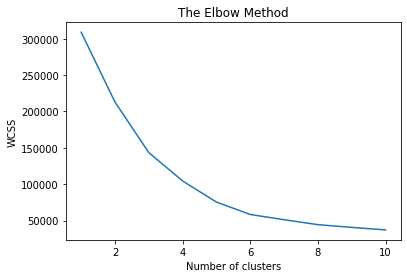

In [16]:
from sklearn.cluster import KMeans
wcss = []
# 'for' loop will run the kmeans with 10 defferent number of clusters, then we compute WCSS to choose the best number of clusters
for i in range(1, 11):
# 'n_clusters' the number of clusters
# ''k-means++'' : to avoid random initialization trap
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
# 'inertia_' : to get the wcss value
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [17]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# y_means is the dependant value that kmeans has built

## Visualising the clusters

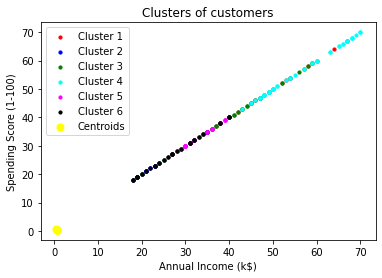

In [20]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 2], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 2], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 2], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, 2], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 2], X[y_kmeans == 4, 2], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 2], X[y_kmeans == 5, 2], s = 10, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()